## IMPORTING MODELS

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.metrics import explained_variance_score
from sklearn.feature_selection import VarianceThreshold

In [144]:
metadata = pd.read_csv("/kaggle/input/gono-unitigs/metadata.csv").dropna()
metadata

,Sample_ID,Year,Country,Continent,Beta.lactamase,Azithromycin,Ciprofloxacin,Ceftriaxone,Cefixime,Tetracycline,...,log2_cro_mic,log2_cfx_mic,log2_tet_mic,log2_pen_mic,azm_sr,cip_sr,cro_sr,cfx_sr,tet_sr,pen_sr
1688,10356_1#1,1998.0,Brasil,America,S,0.032,0.002,0.002,0.016,0.5,...,-8.965784,-5.965784,-1.000000,-3.000000,0.0,0.0,0.0,0.0,0.0,0.0
1689,10356_1#10,2008.0,Brasil,America,S,0.125,0.19,0.012,0.016,24,...,-6.380822,-5.965784,4.584963,-3.000000,0.0,0.0,0.0,0.0,1.0,0.0
1690,10356_1#11,2008.0,Chile,America,S,0.75,6,0.023,0.016,1,...,-5.442222,-5.965784,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
1691,10356_1#12,2008.0,Ecuador,America,R,0.064,0.006,0.006,0.016,12,...,-7.380822,-5.965784,3.584963,0.584963,0.0,0.0,0.0,0.0,1.0,1.0
1692,10356_1#15,1998.0,USA,America,S,0.125,32,0.004,0.016,1.5,...,-7.965784,-5.965784,0.584963,-1.000000,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,SRR5827366,2015.0,New_Zealand,Oceania,0,0.25,0.004,0.004,0.008,0.25,...,-7.965784,-6.965784,-2.000000,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0
3681,SRR5827371,2015.0,New_Zealand,Oceania,0,0.12,0.002,0.004,0.008,0.25,...,-7.965784,-6.965784,-2.000000,-2.000000,0.0,0.0,0.0,0.0,0.0,0.0
3682,SRR5827372,2015.0,New_Zealand,Oceania,0,0.5,0.004,0.008,0.016,1,...,-6.965784,-5.965784,0.000000,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0
3683,SRR5827369,2015.0,New_Zealand,Oceania,0,0.5,8,0.06,0.06,2,...,-4.058894,-4.058894,1.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0


In [145]:
metadata.columns

Index(['Sample_ID', 'Year', 'Country', 'Continent', 'Beta.lactamase',
       'Azithromycin', 'Ciprofloxacin', 'Ceftriaxone', 'Cefixime',
       'Tetracycline', 'Penicillin', 'NG_MAST', 'Group', 'azm_mic', 'cip_mic',
       'cro_mic', 'cfx_mic', 'tet_mic', 'pen_mic', 'log2_azm_mic',
       'log2_cip_mic', 'log2_cro_mic', 'log2_cfx_mic', 'log2_tet_mic',
       'log2_pen_mic', 'azm_sr', 'cip_sr', 'cro_sr', 'cfx_sr', 'tet_sr',
       'pen_sr'],
      dtype='object')

In [146]:
Y_raw = metadata[['Sample_ID', 'azm_sr', 'cip_sr', 'cfx_sr']]
Y_raw

,Sample_ID,azm_sr,cip_sr,cfx_sr
1688,10356_1#1,0.0,0.0,0.0
1689,10356_1#10,0.0,0.0,0.0
1690,10356_1#11,0.0,1.0,0.0
1691,10356_1#12,0.0,0.0,0.0
1692,10356_1#15,0.0,1.0,0.0
...,...,...,...,...
3680,SRR5827366,0.0,0.0,0.0
3681,SRR5827371,0.0,0.0,0.0
3682,SRR5827372,0.0,0.0,0.0
3683,SRR5827369,0.0,1.0,0.0


In [148]:
Xy = pd.merge(azm_sr, Y_raw[['Sample_ID', 'azm_sr']], right_on=['Sample_ID'], left_index=True).drop(['Sample_ID'], axis=1).dropna()
Xy

,ACCGGTCAGGGCGACGGGTTTGCGCCCTTTGAT,TGATACGGCGTGTAGGCGGTGTACCAGCCCGGG,CCGCACGGGGGAAATCCTCGCCTTGGCCAATACGCCCGCCTACGATCCCAACAG,GATATAACTGCGTCCGTCGGCATATTCGCCC,ACCCCGCAACACCTCCTGCTCAACCGCAACGACCTCTTGGTCGGCGG,GGGAAAGGGTAACGTTTGCCGGCGGGGCGGTTGAGGTTGGCGGTT,CAAACTCGAACAGAAAGGCAAGTCGTTTATCTGG,AACCGAGCCGGGCGGCACCGGTACGGCGGGT,GCTTGTCGATGTGCCGGTTGATGTTTTGAGAAACAAACTCGAACAGAAA,GACAAATTCTTGGCGGACGATGACGGCAACAGTACCGAGCGCGGCACCCAATGCCAGCGCG,...,GGCACGGTTGCGCCGCTGTTCGCTGTCTGCCCGGCCGGG,AAAACCGCCATCAGTTTTCCGCTCATCGGAGGA,TTGTTTTTCAAAGCTGACCGGCAACAATTCGCCGTCATGGGTCAAGACAGTATAGGCACG,TTGCCCGTAGTGACGATTTCTACGTTCAGGTTTGCTTCGATCGGAAATTGG,GTCGATGTTTTGAGGAACAAACTCGAACAGAAA,ACCGCCATCAGTTTTCCGCTCATCGGAGGAAGGG,"TCCCAACAGACCCGGCCGGGCAGACAGCGAACAG,GACGGTTTCTTTATTTGATTTGAACGGAAAAACCAT,CGTCAAAGACGCCAACGACGCCGGCACCAAAATCGACAC,CCATCAAAACCGCCATCAGTTTTCCGCTCATCGGA,CCAAGCCACGTCGGCATTCGGTTTCGAGCCGATGTCCA,TTCAGGCTGCCGCCCATAATTTTTTTGAAGGGC",GGAACGCCTGTCCGAGCTTGTCGATGTGCCGGT,CAGCGCATCGGTCATTGTCGGACTCGAGCCGCTGCTGATG,azm_sr
1688,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0.0
1689,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0.0
1690,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0.0
1691,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0.0
1692,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,0,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0.0
3681,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0.0
3682,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0.0
3683,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0.0


In [149]:
X = Xy.drop(['azm_sr'], axis=1)
y = Xy[['azm_sr']]

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [167]:
selector = VarianceThreshold()
X = selector.fit_transform(X)

## MODEL

In [168]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=32)

In [169]:
input_dim = X_train.shape[1]
output_dim = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu', input_dim=input_dim),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=output_dim, activation='sigmoid')
])
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=7, batch_size=32, validation_split=0.2)


Epoch 1/7
36/36 [==============================] - 1s 9ms/step - loss: 0.5323 - accuracy: 0.7805 - val_loss: 0.3969 - val_accuracy: 0.8403
Epoch 2/7
36/36 [==============================] - 0s 4ms/step - loss: 0.3389 - accuracy: 0.8537 - val_loss: 0.2945 - val_accuracy: 0.8854
Epoch 3/7
36/36 [==============================] - 0s 4ms/step - loss: 0.2567 - accuracy: 0.9016 - val_loss: 0.2486 - val_accuracy: 0.9410
Epoch 4/7
36/36 [==============================] - 0s 4ms/step - loss: 0.2027 - accuracy: 0.9390 - val_loss: 0.2001 - val_accuracy: 0.9444
Epoch 5/7
36/36 [==============================] - 0s 4ms/step - loss: 0.1690 - accuracy: 0.9503 - val_loss: 0.1986 - val_accuracy: 0.9549
Epoch 6/7
36/36 [==============================] - 0s 4ms/step - loss: 0.1467 - accuracy: 0.9564 - val_loss: 0.1718 - val_accuracy: 0.9549
Epoch 7/7
36/36 [==============================] - 0s 4ms/step - loss: 0.1301 - accuracy: 0.9547 - val_loss: 0.1670 - val_accuracy: 0.9410


In [170]:
model.evaluate(X_train, Y_train)

45/45 [==============================] - 0s 2ms/step - loss: 0.1462 - accuracy: 0.9450


[0.1462186574935913, 0.9449860453605652]

In [171]:
def plot_matrix(model, X, y, threshold=0.5):
    predicted = tf.squeeze(model.predict(X))
    predicted = np.array([1 if x >= threshold else 0 for x in predicted])
    actual = np.array(y)
    conf_mat = confusion_matrix(actual, predicted)
    displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    displ.plot()

45/45 [==============================] - 0s 2ms/step


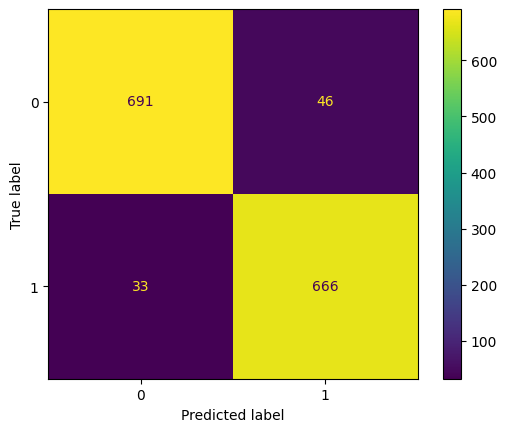

In [172]:
plot_matrix(model, X_train, Y_train)

In [173]:
model.evaluate(X_test,Y_test)

20/20 [==============================] - 0s 2ms/step - loss: 0.1226 - accuracy: 0.9578


[0.12258311361074448, 0.9577922224998474]

20/20 [==============================] - 0s 2ms/step


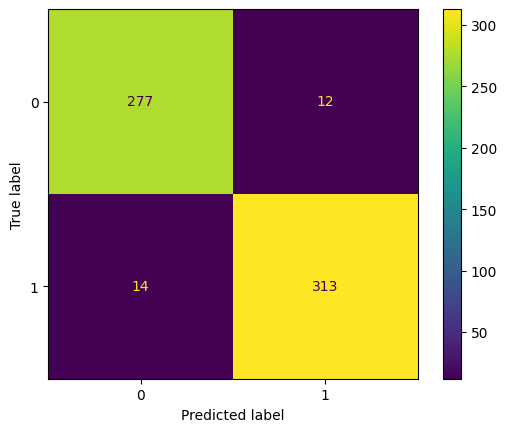

In [174]:
plot_matrix(model, X_test, Y_test)